# Predicting Diabetes Risk

This project uses Python to analyse a dataset related to diabetes risk.  
The data is explored, cleaned, and used to build a machine learning model that predicts whether a person is likely to develop diabetes.  

The workflow includes:
- Data loading and exploration  
- Data preprocessing  
- Model training using decision trees  
- Model evaluation and visualisation  

Tools used: **pandas**, **matplotlib**, **seaborn**, **scikit-learn**


## Libraries

In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, accuracy_score

## Load and Explore the Dataset

In [25]:
# Load dataset 
diabetes_df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [26]:
# Check number of rows and columns
print("Shape of the dataset:", diabetes_df.shape)

Shape of the dataset: (70692, 22)


In [27]:
# View column names and data types
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [28]:
# Check for missing values
print("\nMissing values per column:")
print(diabetes_df.isnull().sum())


Missing values per column:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [29]:
# View basic statistics of numeric columns
diabetes_df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Feature Selection

To reduce the dimensionality of the problem and improve model efficiency,  
features that have a correlation greater than 0.20 with the target variable (`Diabetes_binary`) are selected.  
This helps focus on health indicators most related to diabetes risk.


In [30]:
# Correlation matrix
correlation_matrix = diabetes_df.corr()

# Values with the target variable
target_corr = correlation_matrix["Diabetes_binary"]

# Select variables with correlation > 0.20
selected_features = target_corr[target_corr > 0.20].index.tolist() 

# Show selected feature names
print("Selected features:", selected_features)

Selected features: ['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age']


In [31]:
# Create new DataFrame with selected features
diabetes_selected_df = diabetes_df[selected_features]

# Show new DataFrame
diabetes_selected_df.head()

,Diabetes_binary,HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,Age
0,0.0,1.0,0.0,26.0,0.0,3.0,30.0,0.0,4.0
1,0.0,1.0,1.0,26.0,0.0,3.0,0.0,0.0,12.0
2,0.0,0.0,0.0,26.0,0.0,1.0,10.0,0.0,13.0
3,0.0,1.0,1.0,28.0,0.0,3.0,3.0,0.0,11.0
4,0.0,0.0,0.0,29.0,0.0,2.0,0.0,0.0,8.0


## Cross-Validation Setup

To assess model performance more reliably, cross-validation is used.  
This technique helps evaluate how well the model generalises to new data.
In this case, we use 10-fold cross-validation.

In [32]:
# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# 10-fold cross-validation will be used during model training
# It splits the data into 10 parts and trains the model 10 times, each time using a different part for testing

## Data Preprocessing

The selected features are prepared for modelling.  
This includes separating the target variable, splitting the data into training and test sets,  
and scaling the features to improve model performance.

In [33]:
# Separate features (X) and target (y)
X = diabetes_selected_df.drop("Diabetes_binary", axis=1)
y = diabetes_selected_df["Diabetes_binary"]


# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardise features (fit only on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression Model

A logistic regression model is trained using the selected and scaled features.  
The model's performance is evaluated using accuracy, AUC, and a confusion matrix.

In [34]:
# Train LR Model 
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict and Probabilities 
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", round(accuracy, 4))
print("AUC:", round(auc_score, 4))
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7423
AUC: 0.8172

Confusion Matrix:
 [[5124 1946]
 [1697 5372]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.72      0.74      7070
         1.0       0.73      0.76      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



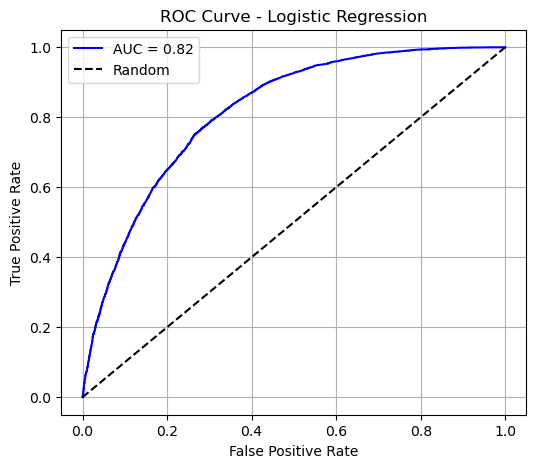

In [35]:
# LR ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

The logistic regression model achieved an accuracy of 74% and an AUC of 0.82.  
This means the model has a good ability to separate people with and without diabetes.  
The confusion matrix and classification report show balanced precision and recall for both classes.

## Random Forest Model
 
Random Forest is an ensemble method that combines multiple decision trees for better performance.

In [36]:
# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
rf_pred = rf_model.predict(X_test_scaled)
rf_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_prob)
rf_cm = confusion_matrix(y_test, rf_pred)

print("Accuracy:", round(rf_accuracy, 4))
print("AUC:", round(rf_auc, 4))
print("\nConfusion Matrix:\n", rf_cm)
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Accuracy: 0.7102
AUC: 0.7797

Confusion Matrix:
 [[4925 2145]
 [1952 5117]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.70      0.71      7070
         1.0       0.70      0.72      0.71      7069

    accuracy                           0.71     14139
   macro avg       0.71      0.71      0.71     14139
weighted avg       0.71      0.71      0.71     14139



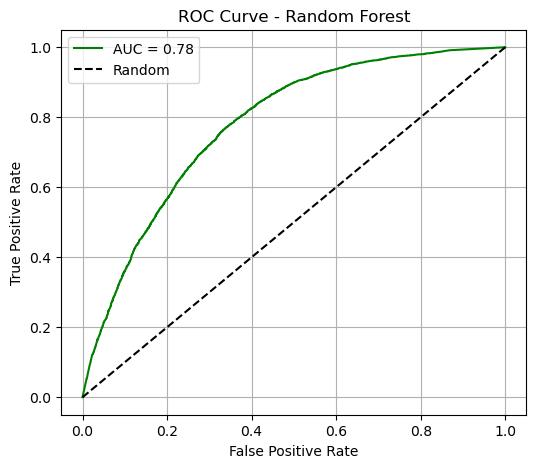

In [37]:
# RF ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {rf_auc:.2f}', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

The Random Forest model achieved an accuracy of 71% and an AUC of 0.78.  
This shows a good performance, but it is slightly lower than the logistic regression model.  
The results are balanced, with similar precision and recall for both classes.  
Random Forest may help with more complex patterns, but in this case, logistic regression performed better.

## Gradient Boosting Model

This algorithm builds trees one at a time, focusing on correcting the errors of previous trees.

In [38]:
# Train the model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train_scaled, y_train)

# Predictions
gbm_pred = gbm_model.predict(X_test_scaled)
gbm_prob = gbm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
gbm_accuracy = accuracy_score(y_test, gbm_pred)
gbm_auc = roc_auc_score(y_test, gbm_prob)
gbm_cm = confusion_matrix(y_test, gbm_pred)

print("Accuracy:", round(gbm_accuracy, 4))
print("AUC:", round(gbm_auc, 4))
print("\nConfusion Matrix:\n", gbm_cm)
print("\nClassification Report:\n", classification_report(y_test, gbm_pred))

Accuracy: 0.7473
AUC: 0.8243

Confusion Matrix:
 [[4977 2093]
 [1480 5589]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.70      0.74      7070
         1.0       0.73      0.79      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



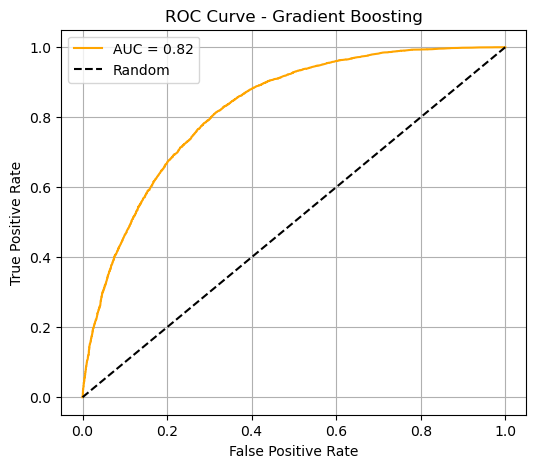

In [39]:
# GBM ROC Curve
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, gbm_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr_gbm, tpr_gbm, label=f'AUC = {gbm_auc:.2f}', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()

The Gradient Boosting model achieved an accuracy of 75% and an AUC of 0.82.  
This is the best performance among the three models tested.  
The model shows strong ability to identify both positive and negative cases.  
It performs better than logistic regression and random forest in this dataset.

## Model Comparison

The three models are compared using cross-validation accuracy and AUC to see which one performs best.  
This helps in selecting the most reliable model for predicting diabetes risk.

Until now, each model was evaluated using a separate test set.  
In this step, 10-fold cross-validation is applied to compare the models in a fair way using the same training data.

In [40]:
# Re-create models (without fitting)
log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Evaluate using cross-validation on full (scaled) dataset
log_scores = cross_val_score(log_model, X_train_scaled, y_train, cv=10, scoring='accuracy')
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=10, scoring='accuracy')
gbm_scores = cross_val_score(gbm_model, X_train_scaled, y_train, cv=10, scoring='accuracy')

# Show accuracy for each model
print("Logistic Regression CV Accuracy:", round(log_scores.mean(), 4))
print("Random Forest CV Accuracy:", round(rf_scores.mean(), 4))
print("Gradient Boosting CV Accuracy:", round(gbm_scores.mean(), 4))

Logistic Regression CV Accuracy: 0.7454
Random Forest CV Accuracy: 0.7112
Gradient Boosting CV Accuracy: 0.7478


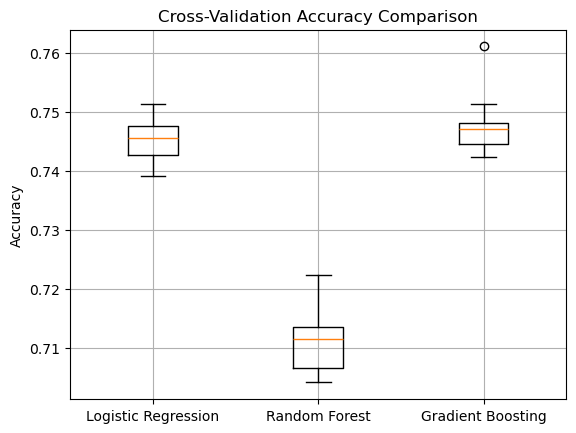

In [41]:
# Boxplot of cross-validation scores
cv_results = {
    "Logistic Regression": log_scores,
    "Random Forest": rf_scores,
    "Gradient Boosting": gbm_scores
}

plt.boxplot(cv_results.values(), tick_labels=cv_results.keys())
plt.title("Cross-Validation Accuracy Comparison")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## Conclusion

Three models were used to predict diabetes risk: logistic regression, random forest, and gradient boosting.

The best performance came from the Gradient Boosting model, with the highest cross-validation accuracy (74.78%) and AUC (0.82 on test set).  
Logistic Regression also gave strong results and is easier to explain.  
Random Forest had the lowest performance in this dataset.

In summary:
- **Gradient Boosting** is the best model for this task.
- **Logistic Regression** is still a good option if interpretability is important.
- **Random Forest** did not perform as well in this case.

This project shows how different models can be tested, compared, and selected based on real data.
